# EHT Cellrank analysis
# Jun Ying

In [1]:
import numpy as np
import anndata
import cellrank as cr
import scanpy as sc
#import scvelo as scv
import matplotlib.pyplot as plt
import pandas as pd

#scv.settings.verbosity = 3
#scv.settings.set_figure_params("scvelo")
cr.settings.verbosity = 2

[rank: 0] Global seed set to 0


In [2]:
#%matplotlib nbagg
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()

from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red', 'darkred']) 

sc.settings.set_figure_params(dpi=80, color_map='viridis', vector_friendly=False,  dpi_save=300)

scanpy==1.9.3 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.9.3 pandas==1.5.3 scikit-learn==1.3.2 statsmodels==0.14.0 python-igraph==0.10.4 pynndescent==0.5.8


In [3]:
adata0 = sc.read('./write/All_outer_leidenv2.h5ad')

In [220]:
adata0.obs['EHT'] = adata.obs['EHT']

/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


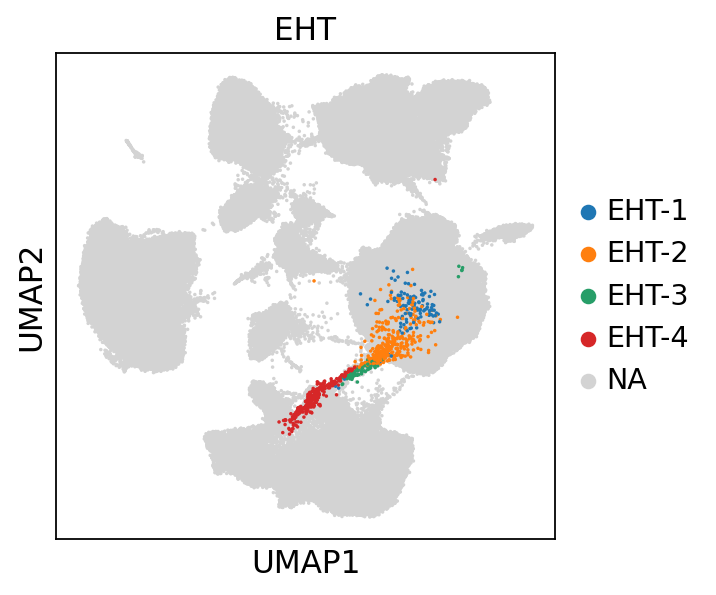

In [223]:
sc.pl.umap(adata0,color='EHT',size=10)

In [65]:
adata1 = sc.read('./write/c25_wt_filtered.h5ad')

In [74]:
adata1.raw.var_names[adata1.raw.var_names.str.startswith('nkx')]

Index(['nkx1.2la', 'nkx1.2lb', 'nkx2-1', 'nkx2-3', 'nkx2-4', 'nkx2.1',
       'nkx2.2a', 'nkx2.2b', 'nkx2.3', 'nkx2.4a', 'nkx2.4b', 'nkx2.5',
       'nkx2.7', 'nkx2.9', 'nkx3', 'nkx3-1', 'nkx3-2', 'nkx3.2', 'nkx3.3',
       'nkx6', 'nkx6-2', 'nkx6.1', 'nkx6.2', 'nkx6.3'],
      dtype='object')

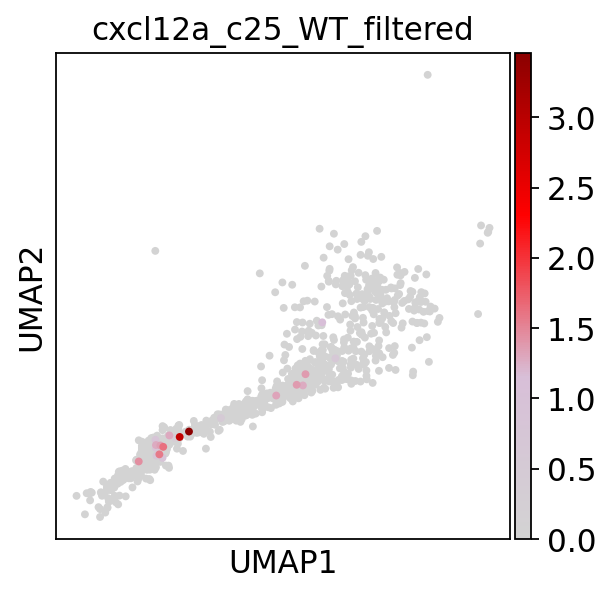

In [77]:
toplot = 'cxcl12a'
samp = 'c25_WT_filtered'
sc.pl.umap(adata1,color=toplot,cmap=cmap,title=f'{toplot}_{samp}',size=50,
           save=f'_{toplot}_{samp}.pdf')

# Use All cells to compute dpt

In [239]:
adata = adata0

In [240]:
sc.tl.diffmap(adata,n_comps=10)

computing Diffusion Maps using n_comps=10(=n_dcs)
computing transitions
    finished (0:00:01)
    eigenvalues of transition matrix
    [1.         0.99894845 0.99864084 0.99825263 0.9967372  0.99557245
     0.9942659  0.9931576  0.9918608  0.9914757 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:01:31)


In [6]:
adata0.obsm['X_diffmap']

array([[-2.0123746e-03, -4.4070156e-03,  2.1112066e-04, ...,
         2.5855432e-05, -2.5959989e-06,  4.4483495e-05],
       [-2.1327795e-03,  8.5858308e-04,  6.7792466e-04, ...,
         6.6927751e-04, -1.3281863e-04,  3.3594112e-04],
       [-2.0639552e-03,  1.2780963e-03,  2.1893096e-03, ...,
         7.0384587e-05,  1.5512387e-05,  1.3503563e-04],
       ...,
       [-1.4264579e-03,  5.7975383e-04,  5.4033316e-04, ...,
         4.8569843e-04, -4.0584040e-05,  2.2689227e-04],
       [-1.7722944e-03,  1.1028252e-03,  1.8816676e-03, ...,
         6.1751962e-05,  1.9828232e-05,  1.0972564e-04],
       [-1.9112675e-03, -4.2867549e-03,  2.1252912e-04, ...,
         2.9725325e-05, -3.8571841e-05,  5.6828459e-05]], dtype=float32)

In [10]:
adata0

AnnData object with n_obs × n_vars = 279384 × 9468
    obs: 'Index', 'Age', 'Development_stage', 'Condition', 'Day', 'Strain', 'Tissue', 'StudyID', 'CellType', 'Genotype', 'Organism', 'Gender', 'Author', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'batch', 'n_counts', 'phase', 'S_score', 'G2M_score', 'EGFP', 'FishID', 'Treatment', 'RFP', 'db_scores', 'FishID_new', 'CellID', 'Cell', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'time', 'morphine', 'AV', 'inhib', 'so.far.ident.subtypes', 'so.far.ident', 'RNA_snn_res.4', 'seurat_clusters', 'work.ident', 'fibro.subtypes', 'is.inhib', 'split.inhib', 'zoom.ident', 'zoom.subtypes', 'plot.ident', 'CM.ident', 'paper.ident', 'RNA_snn_res.2', 'RNA_snn_res.3', 'RNA_snn_res.3.5', 'work.ident2', 'work.i

In [ ]:
sc.pl.diffmap(adata0,color='CT_new2',neighbors_key='neighbors',save='1.pdf')

/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


In [241]:
adata.uns['iroot'] = np.flatnonzero(adata.obs['EHT'] == 'EHT-1')[0]

In [242]:
startcell = adata[adata.uns['iroot'],:].obs_names

In [243]:
adata.obs['Startcell'] = [1 if x==startcell else 0 for x in adata.obs_names]

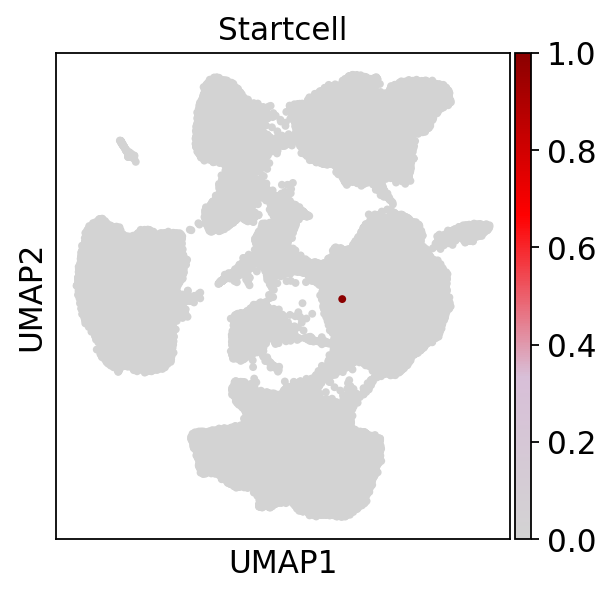

In [244]:
sc.pl.umap(adata,color='Startcell',cmap=cmap,size=50)

In [245]:
sc.tl.dpt(adata)

computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)


/cluster/home/yingjun/miniconda3/envs/sc182/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


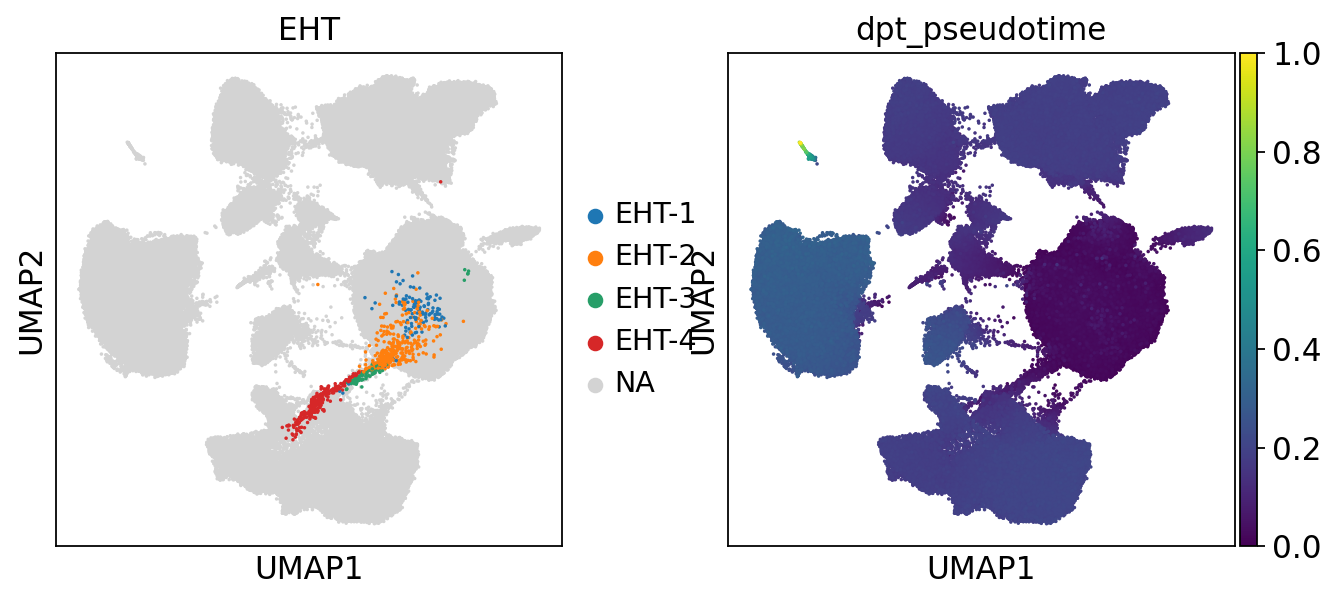

In [246]:
sc.pl.embedding(adata, basis="umap",color=["EHT", "dpt_pseudotime"],size=10)

In [20]:
c25 = adata[adata.obs.CT_new2.str.startswith('Lei')]

adata.shape

adata.write('./write/All_outer_leidenv2.h5ad')

adata = sc.read('./write/All_outer_leidenv2.h5ad')

c25wtfiltered = sc.read('./write/c25_wt_filtered.h5ad')

c25 = c25[c25wtfiltered.obs_names]

c25.shape

c25.write('./write/c25_wt_filtered_original_dpt.h5ad')

c25 = sc.read('./write/c25_wt_filtered_original_dpt.h5ad')

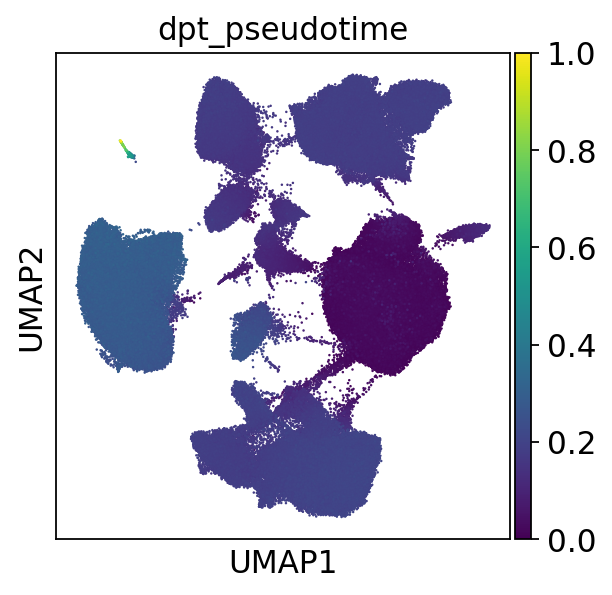

In [42]:
sc.pl.umap(adata,color='dpt_pseudotime',save='All_dpt.pdf',size=5)

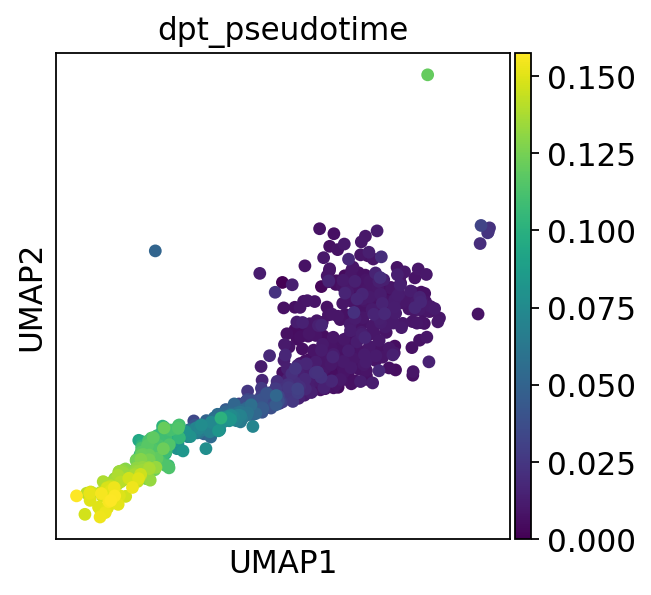

In [38]:
sc.pl.umap(c25,color='dpt_pseudotime',save='c25_wt_filtered_dpt.pdf')

In [4]:
from cellrank.kernels import PseudotimeKe%save

pk = PseudotimeKernel(adata,time_key='dpt_pseudotime')

In [5]:
pk

PseudotimeKernel[n=279384]

In [6]:
pk.compute_transition_matrix()

Computing transition matrix based on pseudotime


  0%|          | 0/279384 [00:00<?, ?cell/s]

    Finish (0:01:55)


PseudotimeKernel[n=279384, dnorm=False, scheme='hard', frac_to_keep=0.3]

In [23]:
adata.obsp['T_fwd']

<279384x279384 sparse matrix of type '<class 'numpy.float64'>'
	with 4343841 stored elements in Compressed Sparse Row format>

In [78]:
adata

AnnData object with n_obs × n_vars = 279384 × 9468
    obs: 'Index', 'Age', 'Development_stage', 'Condition', 'Day', 'Strain', 'Tissue', 'StudyID', 'CellType', 'Genotype', 'Organism', 'Gender', 'Author', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'batch', 'n_counts', 'phase', 'S_score', 'G2M_score', 'EGFP', 'FishID', 'Treatment', 'RFP', 'db_scores', 'FishID_new', 'CellID', 'Cell', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'time', 'morphine', 'AV', 'inhib', 'so.far.ident.subtypes', 'so.far.ident', 'RNA_snn_res.4', 'seurat_clusters', 'work.ident', 'fibro.subtypes', 'is.inhib', 'split.inhib', 'zoom.ident', 'zoom.subtypes', 'plot.ident', 'CM.ident', 'paper.ident', 'RNA_snn_res.2', 'RNA_snn_res.3', 'RNA_snn_res.3.5', 'work.ident2', 'work.i

Using precomputed projection `adata.obsm['T_fwd_umap']`
saving figure to file ./figures/All_cells_cellrank_stream.pdf


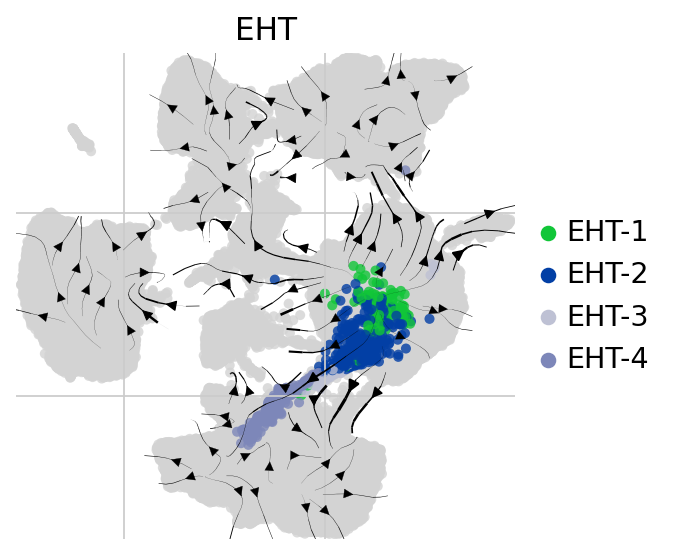

In [60]:
#fig,ax=plt.subplots()
pk.plot_projection(
    color='EHT',
    palette=['#11c638','#023fa5','#bec1d4', '#7d87b9'],
    legend_loc='right margin',
    alpha=0.8,
    #show=False,
    density=1.2,
    max_length=1,
    linewidth=1.2,
    save='./figures/All_cells_cellrank_stream.pdf'
)
#plt.savefig('./figures/scvelo__cellrank_stream.pdf')

In [ ]:
adata.write('./write/All_outer_leidenv2.h5ad')